## Importación de librerías

In [3]:
from ultralytics import YOLO
import torch
import matplotlib.pyplot as plt
import pandas as pd
import json
import cv2

## Entrenamiento

In [2]:
torch.backends.cudnn.enabled = False

In [ ]:
model.train(data="dataset2/dataset.yaml", epochs=40, imgsz=640, batch=16, lr0=0.002, save_json=True)
results = model.val(save_json=True)

with open("metricas", "w") as output:
    output.write(json.dumps(results.results_dict))

jsonDataPorClase = {}
for i in range(len(results.names)):
    try:
        data = results.class_result(i)
        className = results.names[i]
        jsonDataPorClase[className] = {
            "precision": data[0],
            "recall": data[1],
            "map50": data[2],
            "map5095": data[3]
        }
    except:
        pass

with open("m_por_clase.json", "w") as file:
    file.write(json.dumps(jsonDataPorClase))


## Métricas

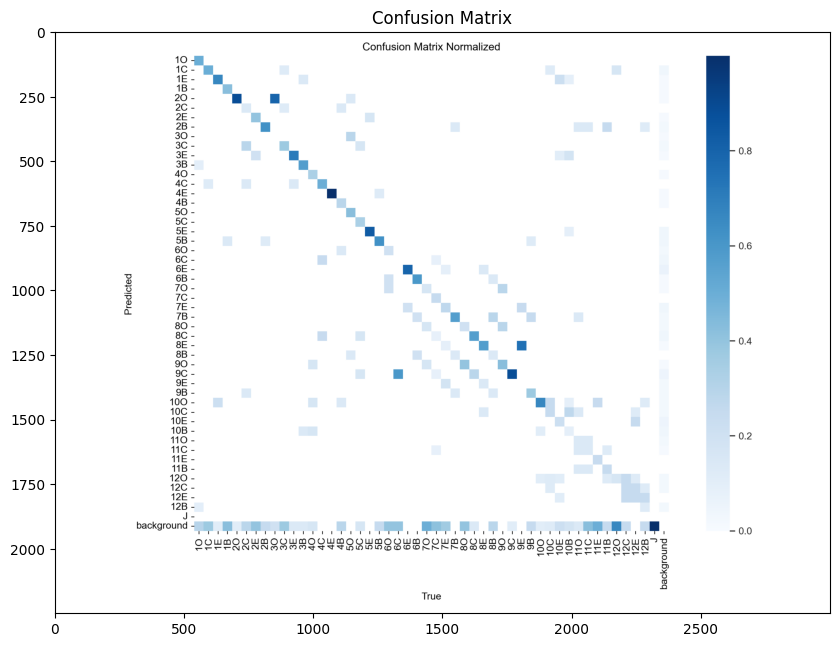

In [13]:
img = cv2.imread("./runs/detect/train/confusion_matrix_normalized.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10, 8))
plt.title("Confusion Matrix")
plt.imshow(img)

Se puede observar que la matríz de confusión no nos muestra muy buenos resultados puesto a que el modelo tiende a equivocarse bastante en la predicción de ciertas clases. Sin embargo, vemos que puede distinguir muy bien otras, como 1 de oro, 1 de copa, 1, de espada, 4 de espadas, etc

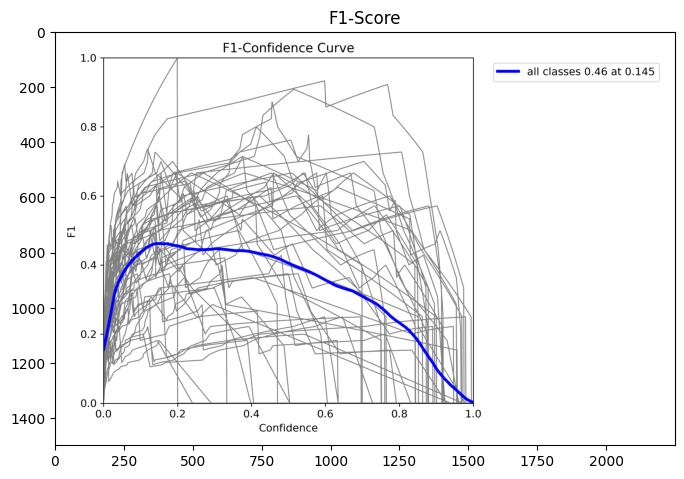

In [16]:
img = cv2.imread("./runs/detect/train/F1_curve.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(8, 6))
plt.title("F1-Score")
plt.imshow(img)

Al ver el F1-score, podemos concluir en que el modelo tiene un desempeño moderado en términos de equilibrio entre precision y recall. Al tener un F1 de 0.46, se entiende que el modelo está haciendo un trabajo razonable al identificar correctamente las cartas (verdaderos positivos) pero no logra identificar varios falos positivos o falsos negativos

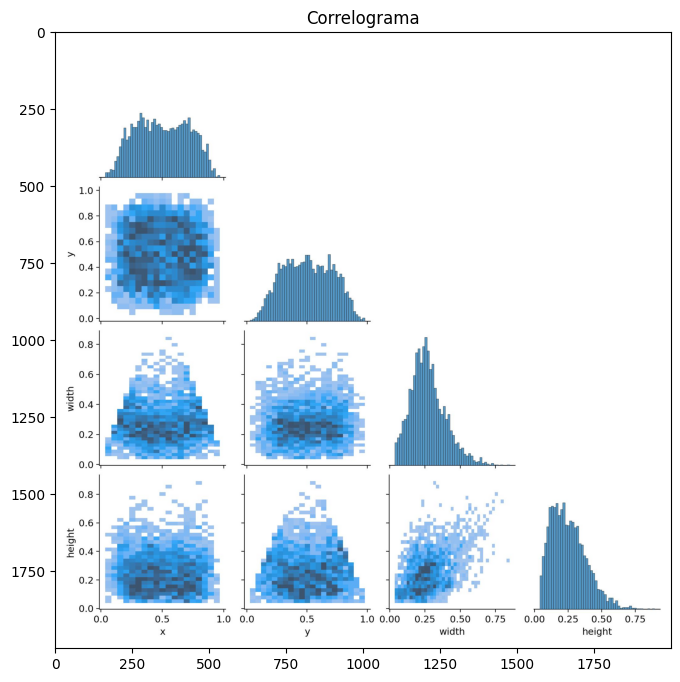

In [20]:
img = cv2.imread("./runs/detect/train/labels_correlogram.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10, 8))
plt.title("Correlograma")
plt.imshow(img)

Este correlograma nos permite observar cómo se distribuyen las coordenadas y dimensiones de las bounding boxes. En los histogramas que se encuentran en la diagonal, podemos observar que las coordenadas x e y están un poco más distribuidas uniformemente (al rededor de 0.5) que la variable width y height que parecen estar sesgadas a la izquierda

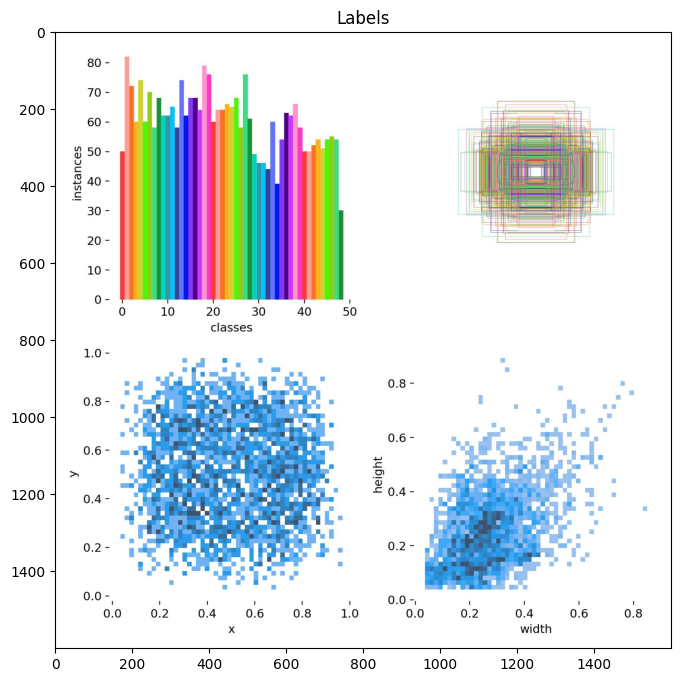

In [71]:
    img = cv2.imread("./runs/detect/train/labels.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10, 8))
plt.title("Labels")
plt.imshow(img)

Vemos que si bien la distribución de clases no está equilibrada al cien por ciento, sólo hay algunas pocas clases que son minoritarias. Seguramente, luego tengamos problemas al tratar de predecirlas

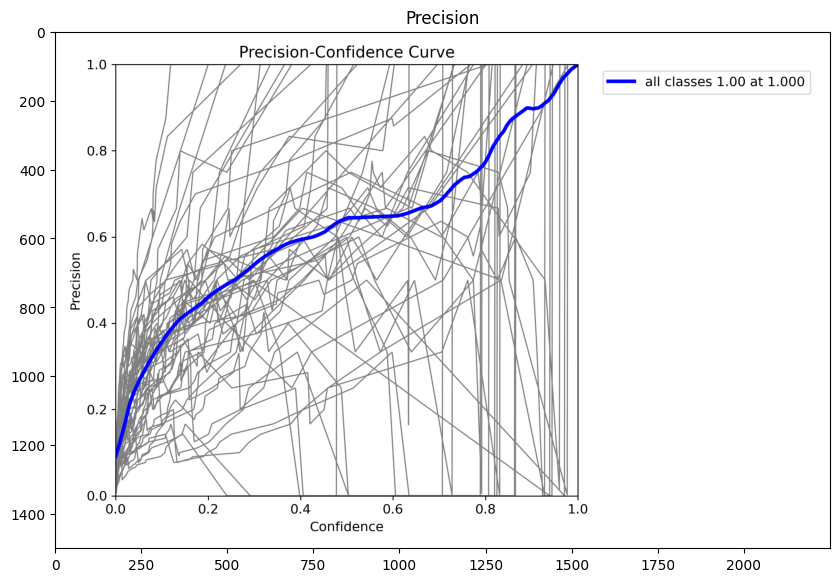

In [23]:
img = cv2.imread("./runs/detect/train/P_curve.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10, 8))
plt.title("Precision")
plt.imshow(img)

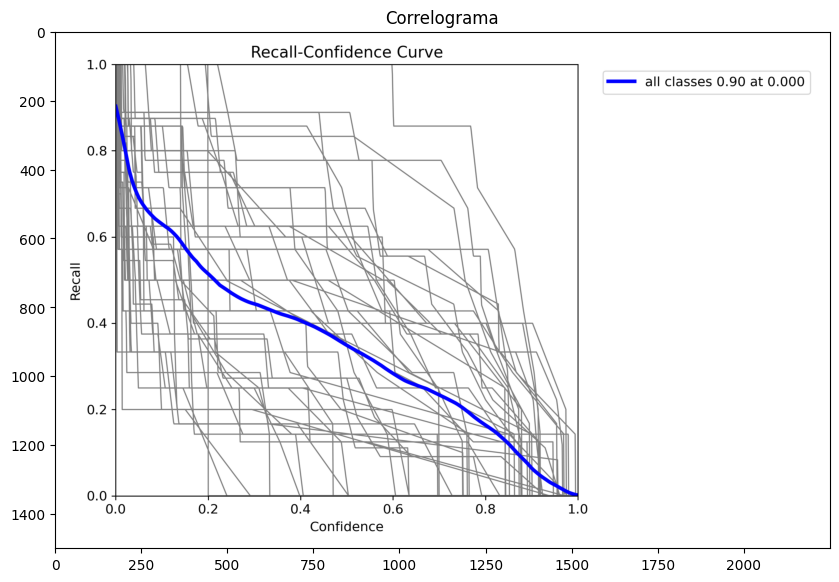

In [25]:
img = cv2.imread("./runs/detect/train/R_curve.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10, 8))
plt.title("Correlograma")
plt.imshow(img)

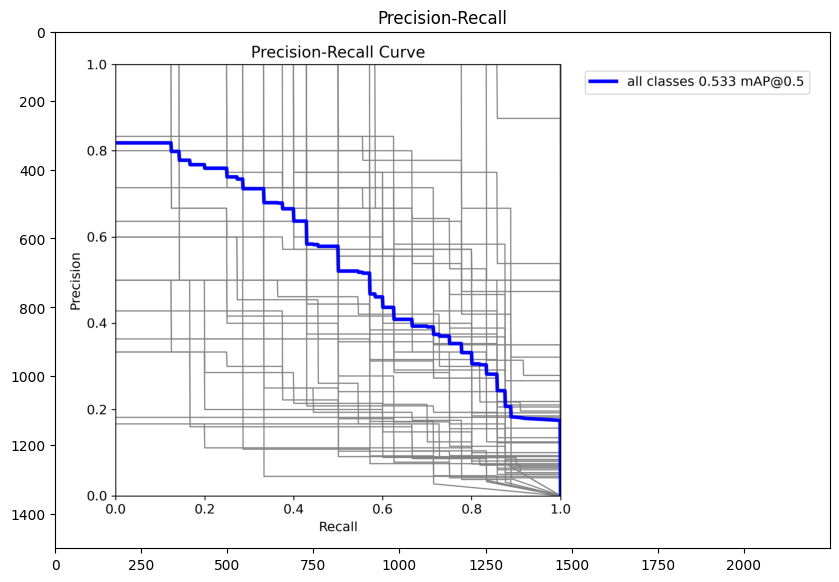

In [24]:
img = cv2.imread("./runs/detect/train/PR_curve.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10, 8))
plt.title("Precision-Recall")
plt.imshow(img)

In [33]:
valdata = pd.read_json("m_por_clase.json")

In [34]:
valdata.head()

,1O,1C,1E,1B,2O,2C,2E,2B,3O,3C,...,10B,11O,11C,11E,11B,12O,12C,12E,12B,J
precision,0.829372,0.606096,0.509036,0.570213,0.526047,0.289181,0.501106,0.419099,0.262928,0.550071,...,0.391650,0.333521,0.252669,0.548961,0.275027,0.085927,0.329748,0.171007,0.490937,0.916232
recall,0.500000,0.875000,0.777778,0.571429,0.888889,0.285714,0.600000,0.875000,0.200000,0.750000,...,0.411660,0.362204,0.285714,0.250000,0.250000,0.166667,0.492605,0.125000,0.250000,1.000000
map50,0.607120,0.765318,0.749374,0.754200,0.688341,0.250457,0.720397,0.593643,0.225005,0.733895,...,0.362934,0.491515,0.341574,0.355061,0.382979,0.261796,0.363742,0.291623,0.440273,0.995000
map5095,0.439317,0.590517,0.581825,0.479924,0.457268,0.173902,0.508845,0.416397,0.165734,0.418114,...,0.299152,0.232345,0.252310,0.259419,0.252456,0.182499,0.300084,0.198711,0.337380,0.497500


In [42]:
carta = valdata.loc["precision"].idxmax()
precision = valdata.loc["precision"].max()
print(f"{carta} tiene la precision más alta con un valor de: {precision}")

7C tiene la precision más alta con un valor de: 1.0


In [45]:
carta = valdata.loc["recall"].idxmax()
recall = valdata.loc["recall"].max()
print(f"{carta} tiene el recall más alto con un valor de: {recall}")

3E tiene el recall más alto con un valor de: 1.0


In [47]:
carta = valdata.loc["map50"].idxmax()
map50 = valdata.loc["map50"].max()
print(f"{carta} tiene el map50 más alto con un valor de: {map50}")

J tiene el map50 más alto con un valor de: 0.995


In [48]:
carta = valdata.loc["map5095"].idxmax()
map5095 = valdata.loc["map5095"].max()
print(f"{carta} tiene el map5095 más alto con un valor de: {map5095}")

4E tiene el map5095 más alto con un valor de: 0.8117297450980391


In [66]:
def plot_proporcion(valor, umbral):
    plt.figure()
    wedges, texts, autotexts = plt.pie((valdata.loc[valor] > 0.5).value_counts(), autopct="%.2f")
    plt.legend(wedges, ["Menor a 50%", "Mayor a 50%"],
              title=valor.upper(),
              loc="center left",
              bbox_to_anchor=(1, 0, 0.5, 1))
    plt.title(f"[{valor.upper()}] Proporción de cartas")
    plt.show()

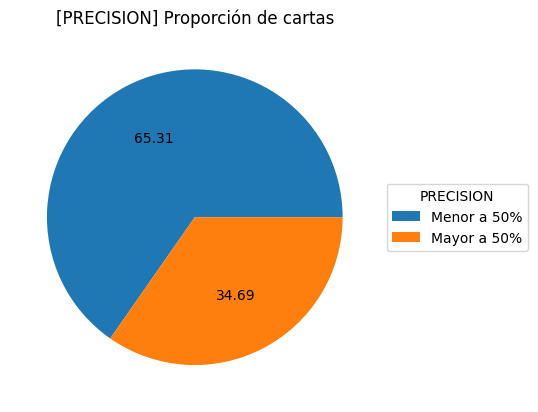

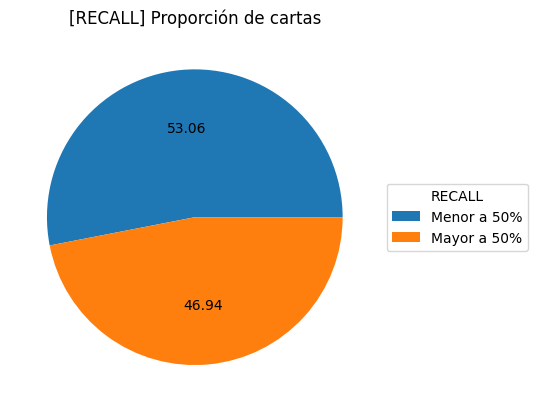

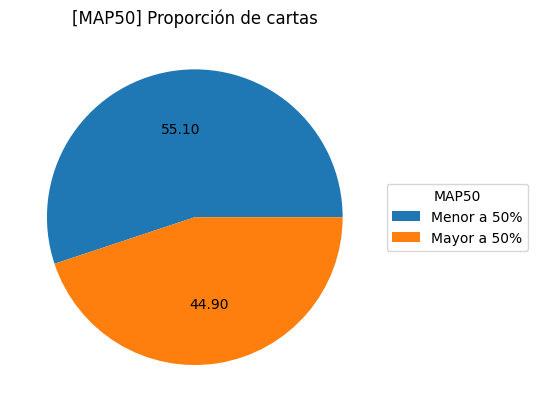

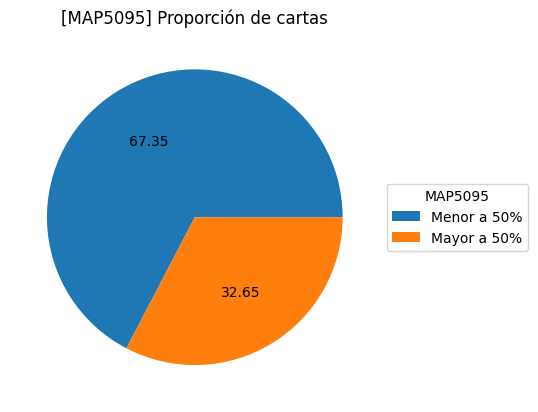

In [68]:
plot_proporcion("precision", 0.5)
plot_proporcion("recall", 0.5)
plot_proporcion("map50", 0.5)
plot_proporcion("map5095", 0.5)

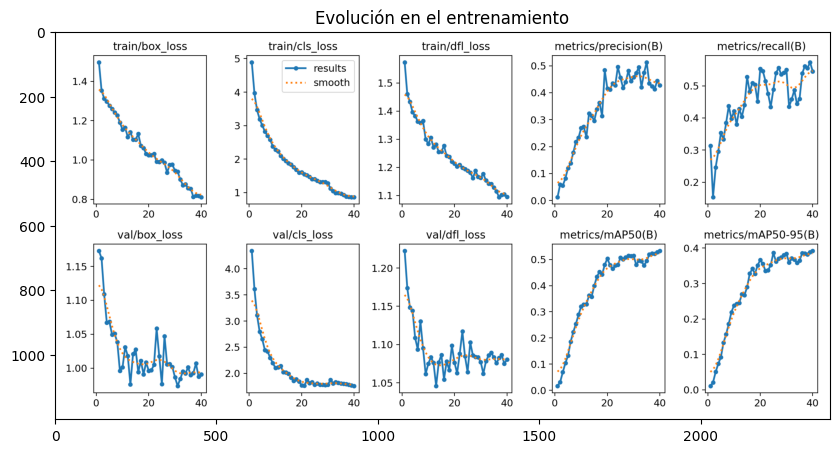

In [70]:
img = cv2.imread("./runs/detect/train/results.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10, 8))
plt.title("Evolución en el entrenamiento")
plt.imshow(img)

## Conclusión
En este trabajo práctico se han puesto en práctica los conocimientos vistos durante la cursada. Al ver las distintas métricas y gráficos, llegamos a la conclusión de que el modelo no ha logrado el mejor desempeño al momento de predecir el tipo de carta. Esto se puede deber a diversos factores:
* Cartas mal etiquetadas
* Un dataset mal equilibrado
* Pocas iteraciones de entrenamiento